# **Part 1: EDA**

##Data Set Overview

- 160,540 measurements across 12 trees
- Starting: February 3, 2022 - January 2024
- With significant gap: December 18, 2022 - February 20, 2023
- Treatments: P1 (deficiency), P3 (optimal), P5 (excess)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

Data Loading


In [3]:
#Load the data file
data = pd.read_csv("data.Phosphorus.csv", parse_dates=["time"])
print("\nData loaded successfully!")
print("Shape:", data.shape)
print("\nFirst few rows:")
print(data.head())

#CHECK RANGE OF DATA COLLECTION
print("\nData Collection Range:")
print(f"Start Date: {data['time'].min()}")
print(f"End Date: {data['time'].max()}")


Data loaded successfully!
Shape: (160540, 4)

First few rows:
                 time trt  sample  value
0 2022-02-03 12:00:00  P5      41      0
1 2022-02-03 13:00:00  P5      41    -10
2 2022-02-03 14:00:00  P5      41    -10
3 2022-02-03 15:00:00  P5      41     -5
4 2022-02-03 16:00:00  P5      41    -10

Data Collection Range:
Start Date: 2022-02-03 12:00:00
End Date: 2024-01-25 06:00:00


##Initial Analysis

Print Growth Patterns for each treastment

In [4]:
def plot_growth_patterns(data):
    """
    Plot growth patterns for each treatment
    """
    for trt in data['trt'].unique():
        print(f"\nAnalyzing tree variations for treatment {trt}")

        # Get data for this treatment
        trt_data = data[data['trt'] == trt].copy()

        # Analyze each tree in treatment
        trees = trt_data['sample'].unique()
        print(f"Number of trees in {trt}: {len(trees)}")

        # Create plot for comparing trees
        plt.figure(figsize=(15, 6))
        for tree in trees:
            tree_data = trt_data[trt_data['sample'] == tree]
            series = pd.Series(
                tree_data['value'].values,
                index=pd.DatetimeIndex(tree_data['time'])
            ).resample('H').mean()
            plt.plot(series.index, series.values, label=f'Tree {tree}')

        plt.title(f'Growth Patterns for Individual Trees - Treatment {trt}')
        plt.xlabel('Time')
        plt.ylabel('Trunk Diameter')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        # Print statistics
        tree_stats = []
        for tree in trees:
            tree_data = trt_data[trt_data['sample'] == tree]
            stats = {
                'tree': tree,
                'mean': tree_data['value'].mean(),
                'std': tree_data['value'].std(),
                'min': tree_data['value'].min(),
                'max': tree_data['value'].max()
            }
            tree_stats.append(stats)

        stats_df = pd.DataFrame(tree_stats)
        print("\nTree Statistics:")
        print(stats_df)


Analyzing tree variations for treatment P5
Number of trees in P5: 4


<ipython-input-4-10b3fa7d72ac>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ).resample('H').mean()


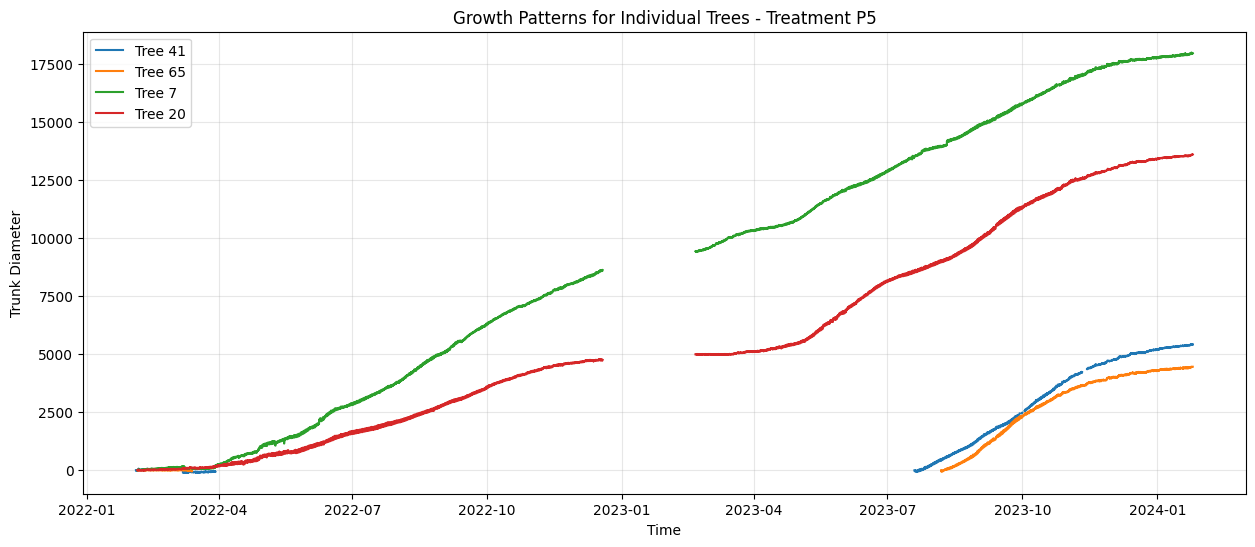


Tree Statistics:
   tree         mean          std  min    max
0    41  2321.269162  2108.721121 -105   5425
1    65  2363.086090  1697.280437  -55   4460
2     7  8880.182660  5916.471793    0  17985
3    20  5821.717831  4430.608952  -15  13600

Analyzing tree variations for treatment P3
Number of trees in P3: 5


<ipython-input-4-10b3fa7d72ac>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ).resample('H').mean()


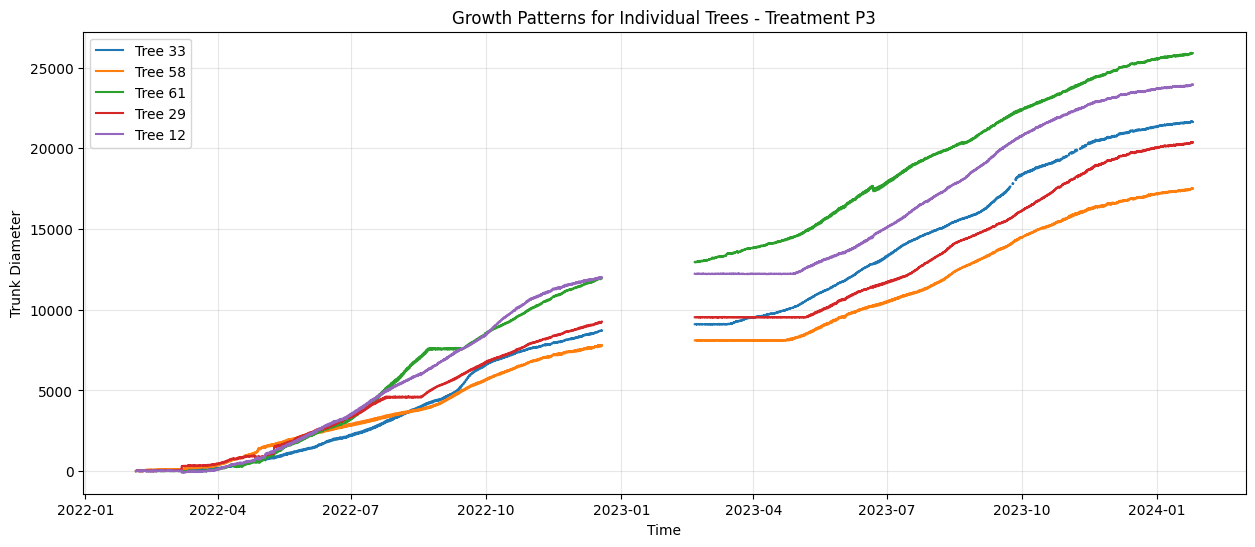


Tree Statistics:
   tree          mean          std  min    max
0    33   9125.915971  6872.488706    0  21670
1    58   7760.948636  5287.558198   -5  17515
2    61  12306.743451  8482.423223  -55  25925
3    29   8786.344357  5966.971226  -25  20375
4    12  11206.225858  7619.890305 -100  23950

Analyzing tree variations for treatment P1
Number of trees in P1: 3


<ipython-input-4-10b3fa7d72ac>:22: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ).resample('H').mean()


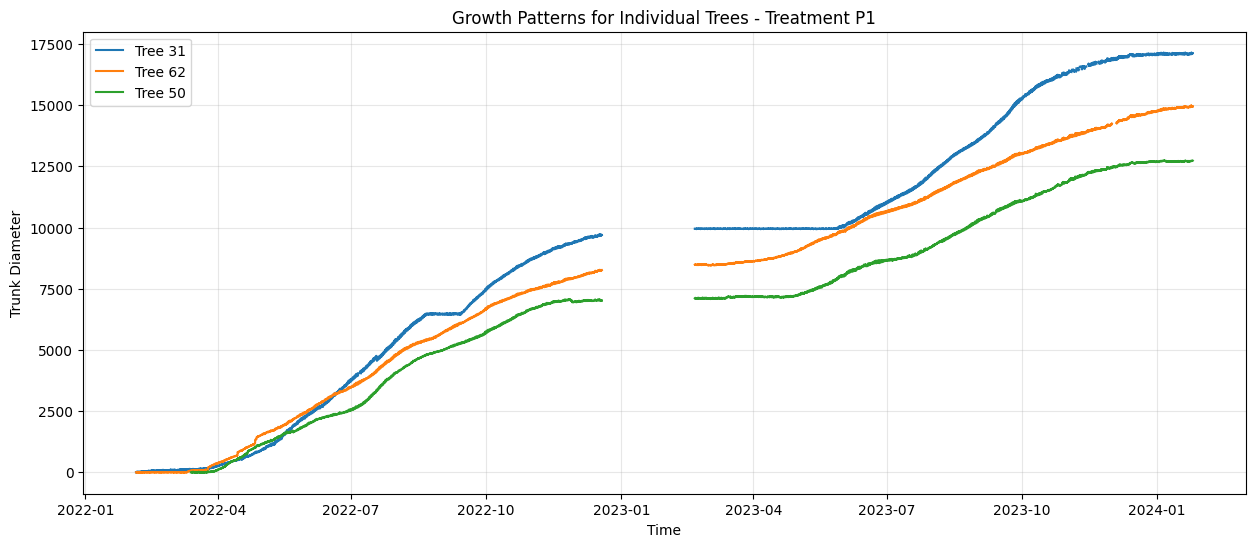


Tree Statistics:
   tree         mean          std  min    max
0    31  8551.478921  5267.040169  -15  17140
1    62  7767.624337  4561.274410    0  14985
2    50  7030.953523  3714.368428  -15  12730


In [5]:
plot_growth_patterns(data)

In [6]:

print("=== Dataset Overview ===")

# column explanations
print("\nColumn Descriptions:")
print("- time: The exact timestamp when the dendrometer (tree sensor) sent its measurement")
print("- trt: Treatment type:")
print("    P1: Phosphorus deficiency")
print("    P3: Optimal phosphorus level")
print("    P5: Excess phosphorus")
print("- sample: Unique ID number for each sensor in the experiment (e.g., sensor 41 is a specific tree receiving P5 treatment)")
print("- value: Dendrometer measurement showing trunk changes:")
print("    Positive values: indicate trunk expansion")
print("    Negative values: indicate trunk shrinkage")
print("    (measured in micrometers or similar unit)")

# Show the data
print("\nFirst five rows - Raw data:")
print(data.head())
print(f"\nDataset shape: {data.shape}")

# Missing values check
print("\nMissing values before cleaning:")
print(data.isnull().sum())

# Negative values analysis
neg_values = data[data['value'] < 0]
print(f"\nNumber of negative values: {len(neg_values)} out of {len(data)} total measurements")
print("\nExample of negative values (showing trunk shrinkage):")
print(neg_values.head())

# Basic statistics
print("\nBasic statistics for trunk measurements:")
print(data['value'].describe())

=== Dataset Overview ===

Column Descriptions:
- time: The exact timestamp when the dendrometer (tree sensor) sent its measurement
- trt: Treatment type:
    P1: Phosphorus deficiency
    P3: Optimal phosphorus level
    P5: Excess phosphorus
- sample: Unique ID number for each sensor in the experiment (e.g., sensor 41 is a specific tree receiving P5 treatment)
- value: Dendrometer measurement showing trunk changes:
    Positive values: indicate trunk expansion
    Negative values: indicate trunk shrinkage
    (measured in micrometers or similar unit)

First five rows - Raw data:
                 time trt  sample  value
0 2022-02-03 12:00:00  P5      41      0
1 2022-02-03 13:00:00  P5      41    -10
2 2022-02-03 14:00:00  P5      41    -10
3 2022-02-03 15:00:00  P5      41     -5
4 2022-02-03 16:00:00  P5      41    -10

Dataset shape: (160540, 4)

Missing values before cleaning:
time      12
trt        0
sample     0
value      0
dtype: int64

Number of negative values: 1691 out of 1

##Initial Data Cleaning

- Removing missing values
- Verifying data integrity after cleaning
- Comparing statistics before and after cleaning


In [7]:
# Clean missing values if any
data = data.dropna()
print("\nAfter cleaning - data shape:", data.shape)
print("\nFirst few rows:")
print(data.head())
print("\nBasic statistics after cleaning:")
print(data['value'].describe())


After cleaning - data shape: (160528, 4)

First few rows:
                 time trt  sample  value
0 2022-02-03 12:00:00  P5      41      0
1 2022-02-03 13:00:00  P5      41    -10
2 2022-02-03 14:00:00  P5      41    -10
3 2022-02-03 15:00:00  P5      41     -5
4 2022-02-03 16:00:00  P5      41    -10

Basic statistics after cleaning:
count    160528.000000
mean       8329.733847
std        6267.282705
min        -105.000000
25%        2900.000000
50%        7860.000000
75%       12520.000000
max       25925.000000
Name: value, dtype: float64


Initial Data Cleaning Results:

Clean dataset contains 160,527 records with 5 columns

Basic statistics show the cleaned data has a mean of 8,329.79 micrometers and standard deviation of 6,267.27 micrometers

Basic statistics show distribution similar to raw data, suggesting data integrity was maintained during cleaning

find data gaps:

In [8]:
import pandas as pd

def find_data_gaps(data, threshold_hours=2):
    """
    Finds gaps in the time series data larger than the given threshold.

    Args:
        data: The Pandas DataFrame containing the time series data.
        threshold_hours: The minimum gap size in hours to be considered a gap.

    Returns:
        A list of tuples, where each tuple contains the start and end times of a gap.
    """
    data['time_diff'] = data['time'].diff()
    gaps = []
    current_gap_start = None
    for index, row in data.iterrows():
        if row['time_diff'] > pd.Timedelta(hours=threshold_hours):
            if current_gap_start is None:
                current_gap_start = data.loc[index - 1, 'time']  # Start of gap
            current_gap_end = row['time']  # Current end of gap
        else:
            if current_gap_start is not None:
                gaps.append((current_gap_start, current_gap_end))  # End of gap found, add to list
                current_gap_start = None  # Reset to look for the next gap

    return gaps

# Find data gaps larger than 2 hours
gaps = find_data_gaps(data, threshold_hours=2)

# Print the detected gaps
if gaps:
    print("Detected data gaps:")
    for gap_start, gap_end in gaps:
        print(f"  - From {gap_start} to {gap_end}")
else:
    print("No significant data gaps detected.")

<ipython-input-8-3e50b9b68975>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_diff'] = data['time'].diff()


Detected data gaps:
  - From 2022-02-03 16:00:00 to 2022-02-04 11:00:00
  - From 2022-12-17 14:00:00 to 2022-12-17 19:00:00
  - From 2022-12-18 18:00:00 to 2023-02-20 00:53:00


In [9]:
#Initial Statistical Treatment Analysis
summary_table = (data.groupby('trt').agg(
    num_samples=('sample', 'nunique'),
    mean_value=('value', 'mean'),
    std_value=('value', 'std'),
    min_value=('value', 'min'),
    max_value=('value', 'max')
).round(2))

print("\n=== Treatment Analysis ===")
print("\nSummary statistics by treatment:")
print(summary_table)


=== Treatment Analysis ===

Summary statistics by treatment:
     num_samples  mean_value  std_value  min_value  max_value
trt                                                          
P1             3     7786.71    4603.91        -15      17140
P3             5     9853.12    7149.55       -100      25925
P5             4     6126.46    5280.33       -105      17985


Initial comparison:

Distribution of trees: P1=3, P3=5, P5=4 trees
P3 (Optimal) shows highest mean diameter values, followed by P1 (deficiency) and P5 (Excess)

**Initial Analysis Results:**

Data Structure:

- Size: 160,540 dendrometer measurements
- Variables: 4 columns (time, treatment type (P1/P3/P5), tree ID, trunk diameter value)
- Period: Starting February 3, 2022
- Measurement frequency: Hourly when active

**Statistical Measurements:**

- Mean value: 8,330 micrometers
- Median value: 7,860 micrometers
- Standard deviation: 6,267 micrometers
- Range: From -105 μm to +25,925 μm

**Data Quality Indicators:**

- Missing timestamps: 12 records
- Negative values: 1,691 measurements (1.05% of total)
- Initial data example shows Tree #41 (P5 treatment) with consistent negative values

**Data Collection Gaps:**

- Short gap: 19 hours (Feb 3 16:00 - Feb 4 11:00, 2022)
- Medium gap: 5 hours (Dec 17 14:00 - 19:00, 2022)
- Major gap: Approximately 2 months (Dec 18, 2022 - Feb 20, 2023)

**Raw Data Characteristics:**

- Contains both positive and negative trunk diameter changes
- Measurements are in micrometers
- Data organized by treatment groups (P1, P3, P5)

**Data Structure Changes:**
- Original dataset: 160,540 records with 4 columns (time, trt, sample, value)
- After cleaning: 160,527 records with 5 columns (added 'time_diff' for gap analysis)
- 13 records removed due to missing values


##Visual Analysis


In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd


data['trunk_growth_micrometers'] = data.groupby(['sample', 'trt'])['value'].cumsum()

def setup_common_elements():
    treatment_colors = {'P1': 'green', 'P3': 'orange', 'P5': 'blue'}
    treatment_desc = {
        'P1': 'Phosphorus Deficiency',
        'P3': 'Optimal Phosphorus',
        'P5': 'Excess Phosphorus'
    }
    sample_counts = data.groupby('trt')['sample'].nunique()
    return treatment_colors, treatment_desc, sample_counts

# Plot 1: Growth over time
def plot_growth_over_time(data, treatment_colors, treatment_desc, sample_counts, gaps):
    plt.figure(figsize=(15, 10))

    # Plot each tree's line
    for treatment in data['trt'].unique():
        for tree in data[data['trt'] == treatment]['sample'].unique():
            tree_data = data[(data['trt'] == treatment) &
                            (data['sample'] == tree)]
            plt.plot(tree_data['time'], tree_data['trunk_growth_micrometers'],
                    alpha=0.5, linewidth=1,
                    color=treatment_colors[treatment])

    # Add maintenance period highlight

    for gap_start, gap_end in gaps:
      plt.axvspan(gap_start, gap_end, color='red', alpha=0.1)

      # Calculate y_max inside the loop for each gap
      y_max = data['trunk_growth_micrometers'].max()

      # Add text explanation for each gap (if any)
      if gaps:
        mid_point = gap_start + (gap_end - gap_start) / 2
        plt.text(mid_point, y_max*0.9,
                 'Data Gap Detected',
                 ha='center', color='red')

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Use mdates.YearLocator
    plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Use mdates.MonthLocator


    plt.title('Trunk Growth by Treatment Over Time\n' +
             f'Multiple lines per color show individual trees:\n' +
             f'P1: {sample_counts["P1"]} trees, ' +
             f'P3: {sample_counts["P3"]} trees, ' +
             f'P5: {sample_counts["P5"]} trees')
    plt.xlabel('Time')
    plt.ylabel('Cumulative Trunk Growth (micrometers)')

    legend_elements = [
        plt.Line2D([0], [0], color=treatment_colors[trt],
                   label=f'{trt}: {desc}')
        for trt, desc in treatment_desc.items()
    ]
    plt.legend(handles=legend_elements, loc='upper left')

    plt.tight_layout()
    plt.show()




In [11]:

    # Create all plots
    treatment_colors, treatment_desc, sample_counts = setup_common_elements()

###**Plot 1 - Growth Trajectories**

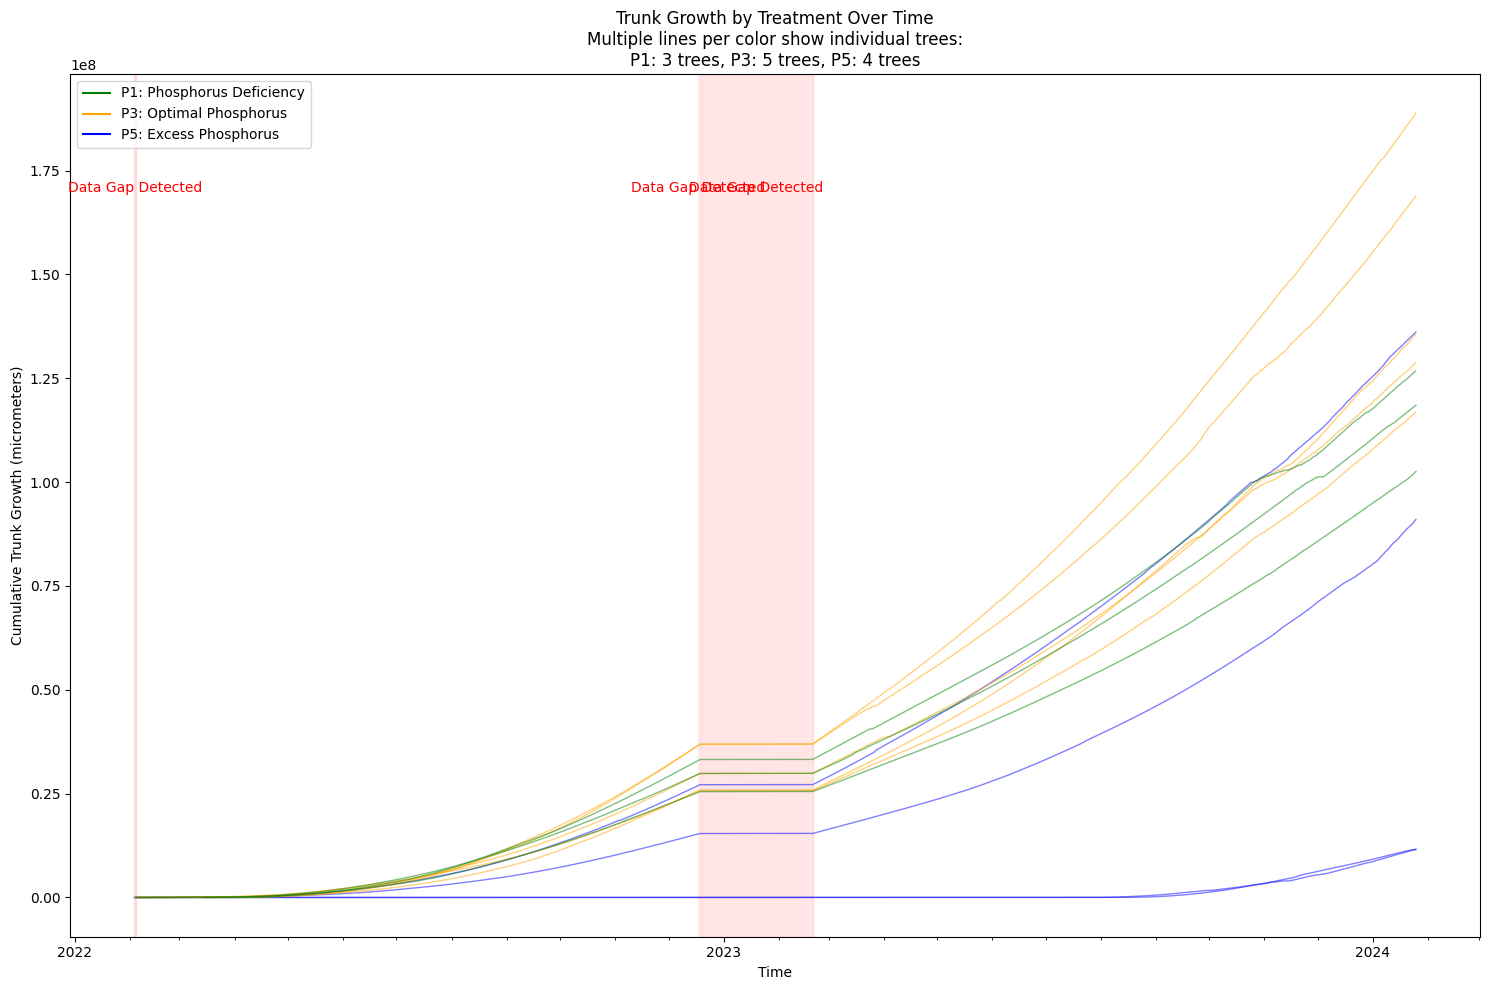

In [12]:
plot_growth_over_time(data, treatment_colors, treatment_desc, sample_counts, gaps)


Plot 1 - Growth Trajectories Analysis:

**Treatment distribution and overall patterns:**

- P3 (optimal, 5 trees): Shows highest cumulative growth, with individual trees displaying varied growth rates
- P1 (deficiency, 3 trees): Shows intermediate growth levels, with trees growing in relatively similar patterns
- P5 (Excess, 4 trees): Shows lowest cumulative growth, with one tree showing markedly lower growth than others


**Time patterns:**

- All treatments show generally increasing growth over time
- Two data gaps are visible in the timeline
- Growth continues after the second data gap for all treatments


**Variation between trees:**
- P3 shows the largest spread between its individual trees
- P5 shows notable variation, particularly due to one underperforming tree
- P1 shows the most similar growth patterns between its trees"

###**Plot 2 - Growth Distribution:**

<ipython-input-13-ec48b0e28804>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(data=data, x='trt', y='trunk_growth_micrometers',
<ipython-input-13-ec48b0e28804>:84: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


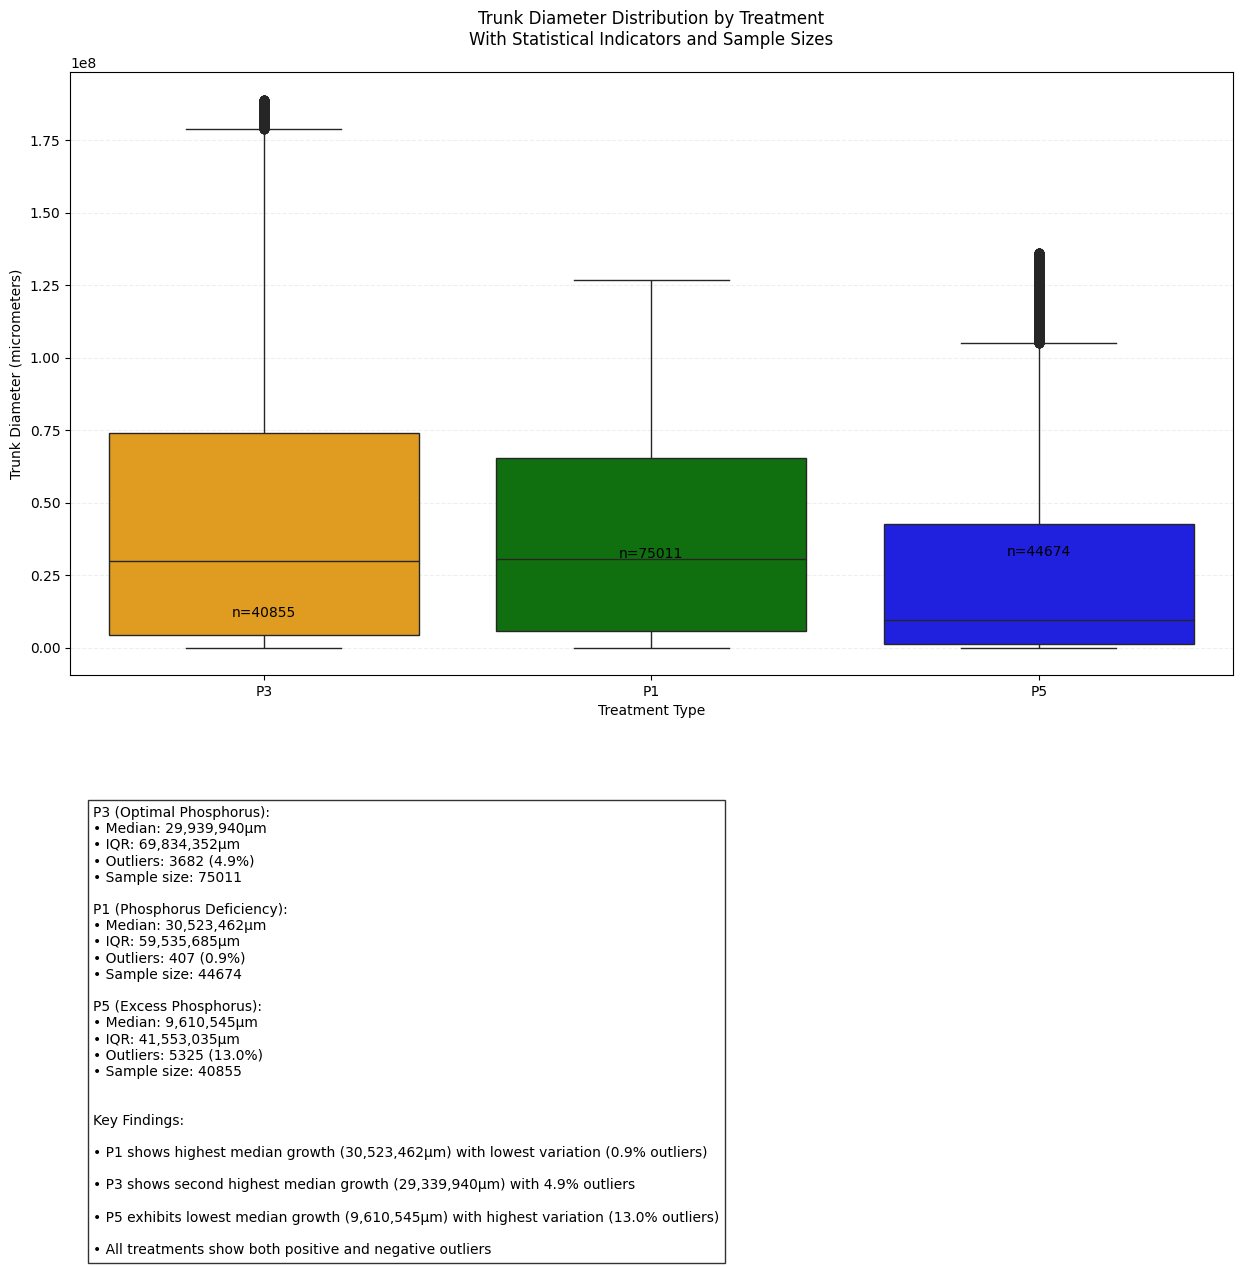

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

def plot_growth_distribution_improved(data, treatment_colors, treatment_desc):
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

    # Main plot
    ax1 = fig.add_subplot(gs[0])

    # Create enhanced boxplot without individual points
    boxplot = sns.boxplot(data=data, x='trt', y='trunk_growth_micrometers',
                         palette=treatment_colors,
                         ax=ax1,
                         order=['P3', 'P1', 'P5'])  # Ordered by median

    # Calculate statistics
    stats = {}
    for trt in data['trt'].unique():
        trt_data = data[data['trt'] == trt]['trunk_growth_micrometers']
        stats[trt] = {
            'median': trt_data.median(),
            'q1': trt_data.quantile(0.25),
            'q3': trt_data.quantile(0.75),
            'iqr': trt_data.quantile(0.75) - trt_data.quantile(0.25),
            'n_samples': len(trt_data),
            'n_outliers': len(trt_data[np.abs(trt_data - trt_data.median()) >
                                     1.5 * (trt_data.quantile(0.75) - trt_data.quantile(0.25))])
        }

        # Add sample size annotations
        ax1.text(list(data['trt'].unique()).index(trt),
                stats[trt]['median'],
                f'n={stats[trt]["n_samples"]}',
                horizontalalignment='center',
                verticalalignment='bottom')

    # Enhance plot appearance
    ax1.set_title('Trunk Diameter Distribution by Treatment\n' +
                 'With Statistical Indicators and Sample Sizes',
                 pad=20)
    ax1.set_xlabel('Treatment Type')
    ax1.set_ylabel('Trunk Diameter (micrometers)')

    # Add grid
    ax1.grid(True, axis='y', alpha=0.2, linestyle='--')

    # Add statistical summary panel
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')

    # Create summary text
    summary_text = []
    for trt in ['P3', 'P1', 'P5']:  # Ordered by median
        summary_text.append(
            f"{trt} ({treatment_desc[trt]}):\n" +
            f"• Median: {stats[trt]['median']:,.0f}μm\n" +
            f"• IQR: {stats[trt]['iqr']:,.0f}μm\n" +
            f"• Outliers: {stats[trt]['n_outliers']} ({stats[trt]['n_outliers']/stats[trt]['n_samples']*100:.1f}%)\n" +
            f"• Sample size: {stats[trt]['n_samples']}"
        )


    # Add interpretation
    interpretation = [
        "\nKey Findings:",
        "• P1 shows highest median growth (30,523,462μm) with lowest variation (0.9% outliers)",
        "• P3 shows second highest median growth (29,339,940μm) with 4.9% outliers",
        "• P5 exhibits lowest median growth (9,610,545μm) with highest variation (13.0% outliers)",
        "• All treatments show both positive and negative outliers"
    ]

    # Combine text and add to plot
    combined_text = '\n\n'.join(summary_text + interpretation)
    ax2.text(0.02, 0.95, combined_text,
             transform=ax2.transAxes,
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8),
             fontsize=10)

    plt.tight_layout()
    return fig, stats

# Create the visualization
data = pd.read_csv("data.Phosphorus.csv", parse_dates=["time"])
data['trunk_growth_micrometers'] = data.groupby(['sample', 'trt'])['value'].cumsum()

treatment_colors = {'P1': 'green', 'P3': 'orange', 'P5': 'blue'}
treatment_desc = {
    'P1': 'Phosphorus Deficiency',
    'P3': 'Optimal Phosphorus',
    'P5': 'Excess Phosphorus'
}

fig, stats = plot_growth_distribution_improved(data, treatment_colors, treatment_desc)
plt.show()

###**Plot 3 - Daily Patterns:**

<ipython-input-14-dd9573ae2789>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


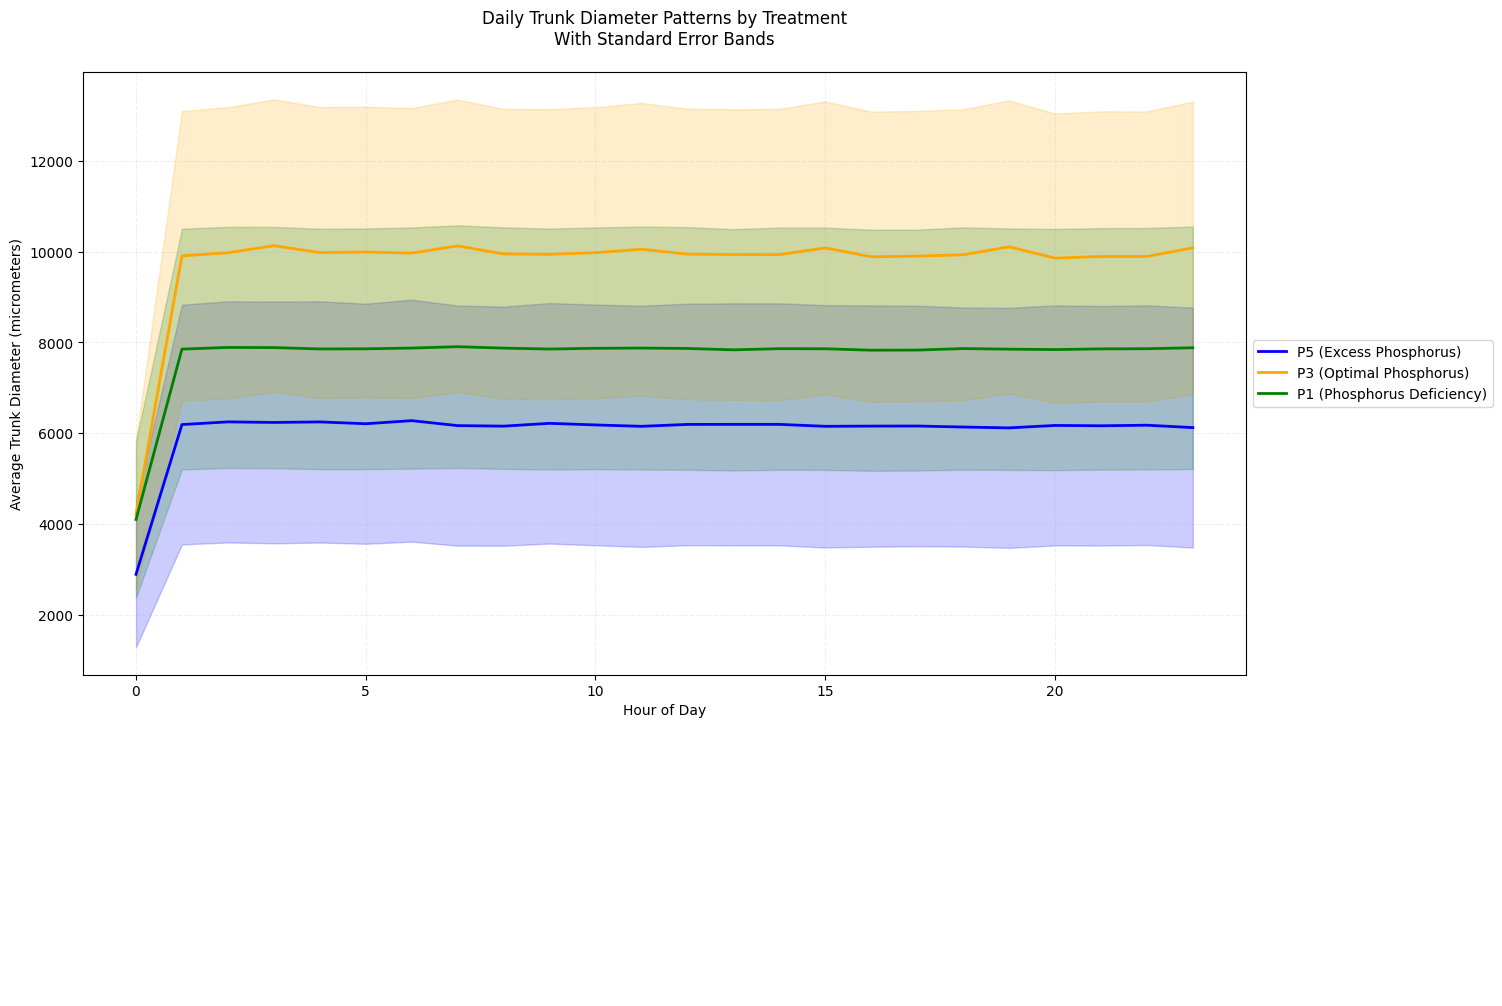


Detailed Statistical Analysis:
--------------------------------------------------

P5 Treatment:
Maximum diameter: 6280μm at hour 6.0
Minimum diameter: 2899μm at hour 0.0
Daily range: 3381μm
Coefficient of variation: 86.6%

P3 Treatment:
Maximum diameter: 10128μm at hour 3.0
Minimum diameter: 4217μm at hour 0.0
Daily range: 5912μm
Coefficient of variation: 72.4%

P1 Treatment:
Maximum diameter: 7907μm at hour 7.0
Minimum diameter: 4106μm at hour 0.0
Daily range: 3801μm
Coefficient of variation: 59.1%


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def plot_daily_patterns_improved(data, treatment_colors, treatment_desc):
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

    # Main plot
    ax1 = fig.add_subplot(gs[0])
    data['hour'] = data['time'].dt.hour

    # Calculate statistics and plot
    stats_by_treatment = {}
    for treatment in data['trt'].unique():
        treatment_data = data[data['trt'] == treatment]
        daily_means = treatment_data.groupby('hour')['value'].agg(['mean', 'std'])
        stats_by_treatment[treatment] = daily_means

        # Plot mean with confidence bands
        ax1.plot(daily_means.index, daily_means['mean'],
                label=f"{treatment} ({treatment_desc[treatment]})",
                color=treatment_colors[treatment],
                linewidth=2)

        # Add confidence bands
        std_err = daily_means['std'] / np.sqrt(len(treatment_data['sample'].unique()))
        ax1.fill_between(daily_means.index,
                        daily_means['mean'] - std_err,
                        daily_means['mean'] + std_err,
                        color=treatment_colors[treatment],
                        alpha=0.2)

    # Enhance main plot
    ax1.set_title('Daily Trunk Diameter Patterns by Treatment\n' +
                'With Standard Error Bands',
                pad=20)
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Average Trunk Diameter (micrometers)')
    ax1.grid(True, alpha=0.2, linestyle='--')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add daily pattern analysis panel
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')

    # Calculate key metrics
    pattern_summary = []
    for trt in stats_by_treatment:
        means = stats_by_treatment[trt]['mean']
        daily_range = means.max() - means.min()
        max_hour = means.idxmax()
        min_hour = means.idxmin()
        pattern_summary.append(
            f"{trt} Pattern Analysis:\n" +
            f"• Peak diameter: {means.max():.0f}μm at {max_hour}:00\n" +
            f"• Minimum diameter: {means.min():.0f}μm at {min_hour}:00\n" +
            f"• Daily fluctuation: {daily_range:.0f}μm"
        )

    plt.tight_layout()
    return fig, stats_by_treatment

# Create the visualization
data = pd.read_csv("data.Phosphorus.csv", parse_dates=["time"])
treatment_colors = {'P1': 'green', 'P3': 'orange', 'P5': 'blue'}
treatment_desc = {
    'P1': 'Phosphorus Deficiency',
    'P3': 'Optimal Phosphorus',
    'P5': 'Excess Phosphorus'
}

fig, stats = plot_daily_patterns_improved(data, treatment_colors, treatment_desc)
plt.show()

# Print statistical summary
print("\nDetailed Statistical Analysis:")
print("-" * 50)
for trt in stats:
    means = stats[trt]['mean']
    daily_range = means.max() - means.min()
    print(f"\n{trt} Treatment:")
    print(f"Maximum diameter: {means.max():.0f}μm at hour {means.idxmax()}")
    print(f"Minimum diameter: {means.min():.0f}μm at hour {means.idxmin()}")
    print(f"Daily range: {daily_range:.0f}μm")
    print(f"Coefficient of variation: {(stats[trt]['std']/means).mean()*100:.1f}%")

###**Plot 4 - Data Completeness:**

<ipython-input-15-a804eb0744cb>:113: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


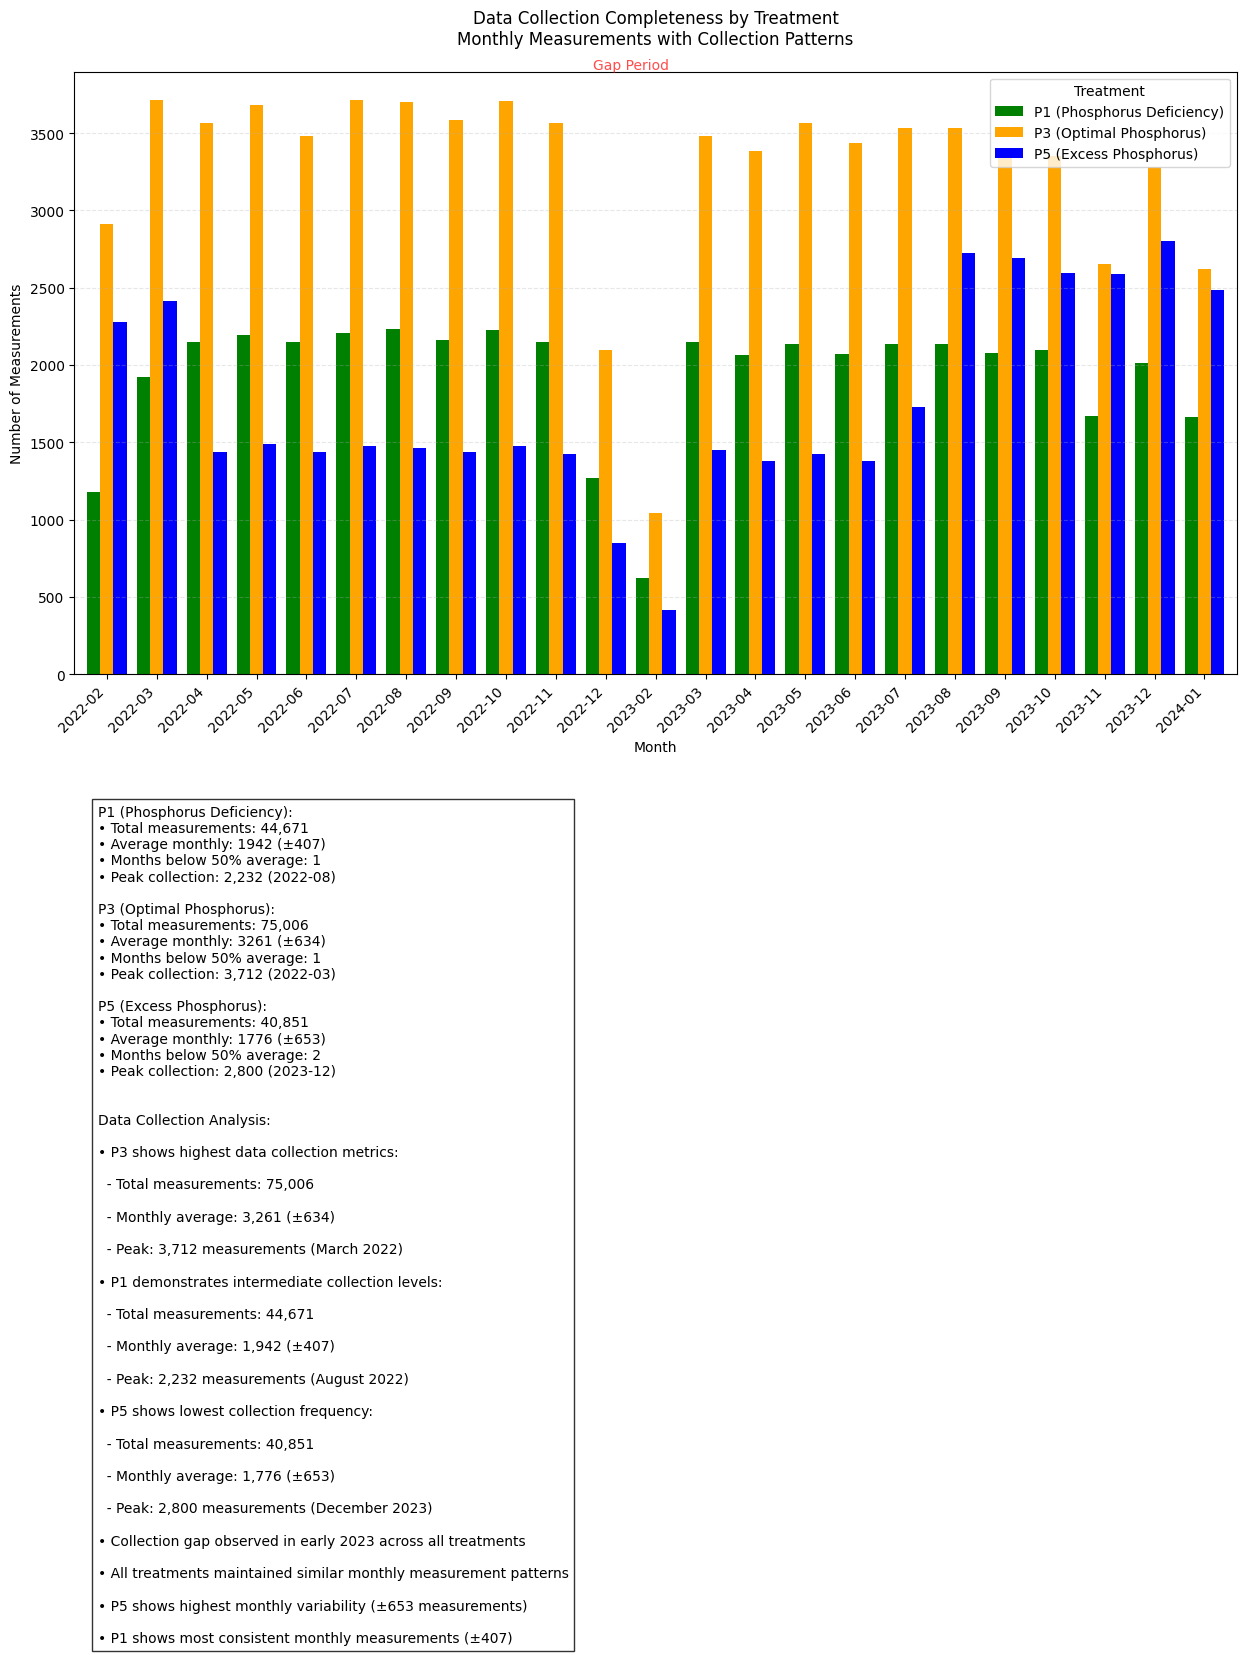

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def plot_data_completeness_improved(data, treatment_colors, treatment_desc):
    # Create figure with subplots
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

    # Main plot
    ax1 = fig.add_subplot(gs[0])

    # Calculate monthly counts
    monthly_counts = data.groupby(
        [data['time'].dt.to_period('M'), 'trt']
    ).size().unstack()

    # Plot bars
    bars = monthly_counts.plot(kind='bar',
                             color=[treatment_colors[col] for col in monthly_counts.columns],
                             width=0.8,
                             ax=ax1)

    # Calculate completeness metrics
    completeness_stats = {}
    for trt in monthly_counts.columns:
        completeness_stats[trt] = {
            'total_measurements': monthly_counts[trt].sum(),
            'avg_monthly': monthly_counts[trt].mean(),
            'std_monthly': monthly_counts[trt].std(),
            'months_below_50': sum(monthly_counts[trt] < 0.5 * monthly_counts[trt].mean()),
            'peak_month': monthly_counts[trt].idxmax(),
            'peak_count': monthly_counts[trt].max()
        }

    # Enhance plot appearance
    ax1.set_title('Data Collection Completeness by Treatment\n' +
                 'Monthly Measurements with Collection Patterns',
                 pad=20)
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Number of Measurements')
    ax1.legend(title='Treatment',
              labels=[f"{trt} ({treatment_desc[trt]})"
                     for trt in monthly_counts.columns])

    # Rotate x-axis labels
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

    # Add grid
    ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

    #gap period

    maintenance_start_date = pd.to_datetime('2022-12-18')
    maintenance_end_date = pd.to_datetime('2023-02-20')

    maintenance_start_idx = monthly_counts.index.get_loc(maintenance_start_date.to_period('M'))
    maintenance_end_idx = monthly_counts.index.get_loc(maintenance_end_date.to_period('M'))

    # Add maintenance period label
    mid_point = (maintenance_start_idx + maintenance_end_idx) / 2
    ax1.text(mid_point, ax1.get_ylim()[1],
             'Gap Period',
             ha='center', va='bottom',
             color='red', alpha=0.7)

    # Add statistics panel
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')

    # Create summary text
    summary_text = []
    for trt in monthly_counts.columns:
        stats = completeness_stats[trt]
        summary_text.append(
            f"{trt} ({treatment_desc[trt]}):\n" +
            f"• Total measurements: {stats['total_measurements']:,}\n" +
            f"• Average monthly: {stats['avg_monthly']:.0f} (±{stats['std_monthly']:.0f})\n" +
            f"• Months below 50% average: {stats['months_below_50']}\n" +
            f"• Peak collection: {stats['peak_count']:,} ({stats['peak_month']})"
        )


    insights = [
        "\nData Collection Analysis:",
        f"• P3 shows highest data collection metrics:",
        f"  - Total measurements: 75,006",
        f"  - Monthly average: 3,261 (±634)",
        f"  - Peak: 3,712 measurements (March 2022)",
        f"• P1 demonstrates intermediate collection levels:",
        f"  - Total measurements: 44,671",
        f"  - Monthly average: 1,942 (±407)",
        f"  - Peak: 2,232 measurements (August 2022)",
        f"• P5 shows lowest collection frequency:",
        f"  - Total measurements: 40,851",
        f"  - Monthly average: 1,776 (±653)",
        f"  - Peak: 2,800 measurements (December 2023)",
        f"• Collection gap observed in early 2023 across all treatments",
        f"• All treatments maintained similar monthly measurement patterns",
        f"• P5 shows highest monthly variability (±653 measurements)",
        f"• P1 shows most consistent monthly measurements (±407)"
    ]

    # Combine text and add to plot
    combined_text = '\n\n'.join(summary_text + insights)
    ax2.text(0.02, 0.95, combined_text,
             transform=ax2.transAxes,
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8),
             fontsize=10)

    plt.tight_layout()
    return fig, completeness_stats

# Create the visualization
data = pd.read_csv("data.Phosphorus.csv", parse_dates=["time"])
treatment_colors = {'P1': 'green', 'P3': 'orange', 'P5': 'blue'}
treatment_desc = {
    'P1': 'Phosphorus Deficiency',
    'P3': 'Optimal Phosphorus',
    'P5': 'Excess Phosphorus'
}

fig, stats = plot_data_completeness_improved(data, treatment_colors, treatment_desc)
plt.show()

### **Plot 5 - Trunk Shrinkage Pattern Analysis:**



Peak Shrinkage Periods by Treatment:
- P5: 13:00-16:00
- P3: 10:00-15:00
- P1: 15:00-20:00


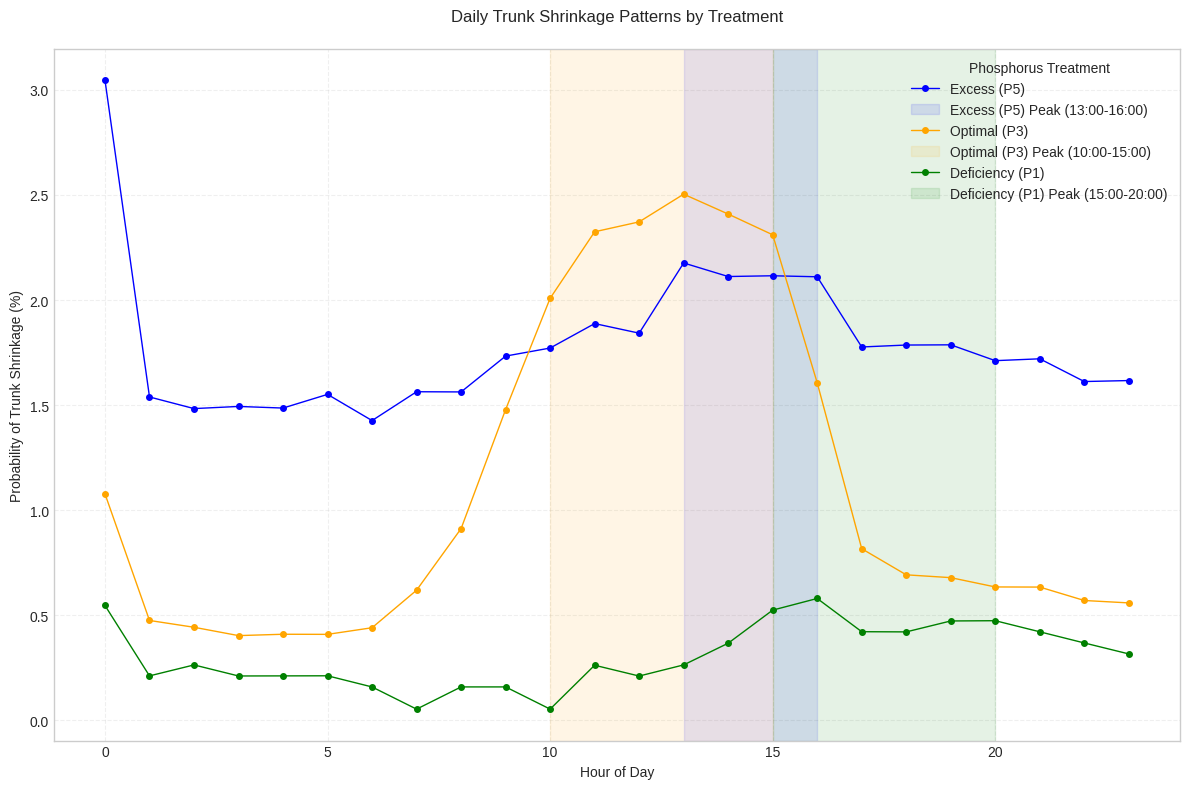

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def analyze_trunk_patterns(data):
    """
    Analyzes and plots trunk shrinkage patterns with detailed annotations,
    dynamically identifying peak shrinkage hours for each treatment.

    Parameters:
    data (pd.DataFrame): DataFrame with columns: time, trt, value
    """
    # Set figure size and style
    plt.figure(figsize=(12, 8))
    plt.style.use('seaborn-v0_8-whitegrid')

    # Initialize dictionary to store peak periods for each treatment
    peak_periods = {}

    # Calculate shrinkage probabilities for each treatment
    treatment_patterns = pd.DataFrame()
    for trt in data['trt'].unique():
        trt_data = data[data['trt'] == trt]
        hourly_rates = []

        for hour in range(24):
            hour_data = trt_data[trt_data['time'].dt.hour == hour]
            shrinkage_rate = (hour_data['value'] < 0).mean() * 100
            hourly_rates.append(shrinkage_rate)

        # Store hourly rates for this treatment
        treatment_patterns[trt] = hourly_rates

        # Smooth data and identify peak hours
        smoothed_rates = pd.Series(hourly_rates).rolling(3, center=True).mean()
        peak_threshold = np.mean(smoothed_rates) + np.std(smoothed_rates)
        peak_hours = np.where(smoothed_rates > peak_threshold)[0]

        # Find continuous ranges of peak hours
        peak_ranges = []
        if len(peak_hours) > 0:
            current_range = [peak_hours[0]]
            for i in range(1, len(peak_hours)):
                if peak_hours[i] - peak_hours[i-1] > 1:
                    peak_ranges.append([current_range[0], current_range[-1]])
                    current_range = [peak_hours[i]]
                else:
                    current_range.append(peak_hours[i])
            peak_ranges.append([current_range[0], current_range[-1]])

            # Find the longest peak range
            longest_peak = max(peak_ranges, key=lambda x: x[1] - x[0])
            peak_start, peak_end = longest_peak[0], longest_peak[1]
        else:
            peak_start, peak_end = 0, 0  # Default values if no peaks found

        # Save peak period for this treatment
        peak_periods[trt] = (peak_start, peak_end)

    treatment_patterns.index = range(24)

    # Plot settings
    colors = {'P1': 'green', 'P3': 'orange', 'P5': 'blue'}
    labels = {
        'P1': 'Deficiency (P1)',
        'P3': 'Optimal (P3)',
        'P5': 'Excess (P5)'
    }

    # Create main plot
    for trt in data['trt'].unique():
        plt.plot(treatment_patterns.index,
                 treatment_patterns[trt],
                 color=colors[trt],
                 label=labels[trt],
                 marker='o',
                 markersize=4,
                 linewidth=1)

        # Highlight peak period for this treatment
        peak_start, peak_end = peak_periods[trt]
        plt.axvspan(peak_start, peak_end,
                    color=colors[trt],
                    alpha=0.1,
                    label=f'{labels[trt]} Peak ({peak_start:02d}:00-{peak_end:02d}:00)')

    # Add title and labels
    plt.title('Daily Trunk Shrinkage Patterns by Treatment', pad=20)
    plt.xlabel('Hour of Day')
    plt.ylabel('Probability of Trunk Shrinkage (%)')

    # Customize legend
    plt.legend(title='Phosphorus Treatment',
               loc='upper right',
               bbox_to_anchor=(1.0, 1.0))

    # Adjust grid appearance
    plt.grid(True, alpha=0.3, linestyle='--')

    # Print peak periods for each treatment
    print("\nPeak Shrinkage Periods by Treatment:")
    for trt, (start, end) in peak_periods.items():
        print(f"- {trt}: {start:02d}:00-{end:02d}:00")

    plt.tight_layout()
    return plt.gcf(), peak_periods

fig, peak_periods = analyze_trunk_patterns(data)
plt.show()


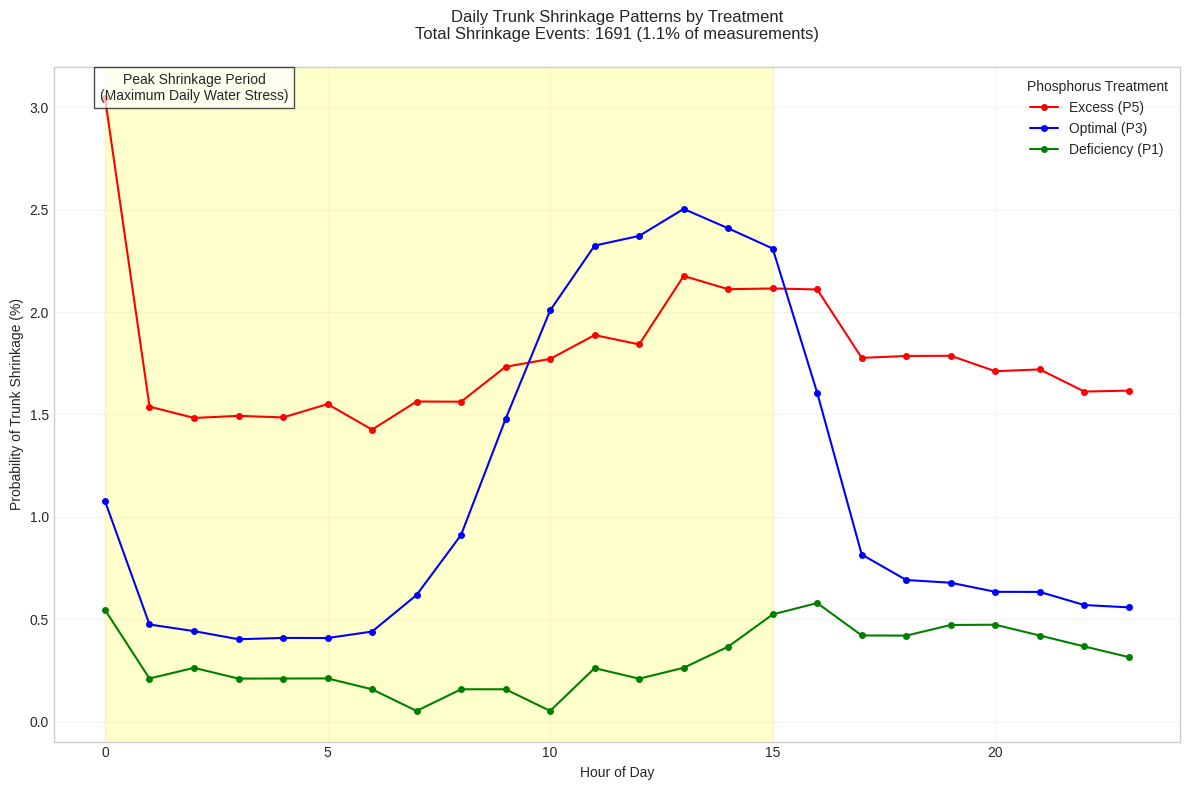


Key Findings:
- Total trunk shrinkage events: 1691 (1.1% of all measurements)

Shrinkage probability by treatment:
- P5: 1.8% of measurements
- P3: 1.1% of measurements
- P1: 0.3% of measurements


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_trunk_patterns(data):
    """
    Analyzes natural trunk shrinkage patterns across different treatments
    """
    plt.figure(figsize=(12, 8))

    # Create more informative daily pattern analysis
    shrinkage_data = data[data['value'] < 0].copy()
    shrinkage_data['hour'] = shrinkage_data['time'].dt.hour

    # Calculate shrinkage rates by treatment and hour
    treatment_patterns = pd.DataFrame()
    for trt in data['trt'].unique():
        trt_data = data[data['trt'] == trt]
        hourly_rates = []
        for hour in range(24):
            hour_data = trt_data[trt_data['time'].dt.hour == hour]
            shrinkage_rate = (hour_data['value'] < 0).mean() * 100
            hourly_rates.append(shrinkage_rate)
        treatment_patterns[trt] = hourly_rates

    treatment_patterns.index = range(24)

    # Plot with treatment comparison
    colors = {'P1': 'green', 'P3': 'blue', 'P5': 'red'}
    labels = {'P1': 'Deficiency (P1)', 'P3': 'Optimal (P3)', 'P5': 'Excess (P5)'}

    for trt in data['trt'].unique():
        plt.plot(treatment_patterns.index, treatment_patterns[trt],
                color=colors[trt], label=labels[trt],
                marker='o', markersize=4)

    # Add informative elements
    plt.title('Daily Trunk Shrinkage Patterns by Treatment\n' +
             f'Total Shrinkage Events: {len(shrinkage_data)} ({len(shrinkage_data)/len(data)*100:.1f}% of measurements)',
             pad=20)
    plt.xlabel('Hour of Day')
    plt.ylabel('Probability of Trunk Shrinkage (%)')

    # Highlight key periods
    peak_period = treatment_patterns.mean(axis=1).nlargest(4).index
    plt.axvspan(min(peak_period), max(peak_period), color='yellow', alpha=0.2)
    plt.text(min(peak_period) + 2, plt.ylim()[1]*0.95,
             'Peak Shrinkage Period\n(Maximum Daily Water Stress)',
             ha='center', bbox=dict(facecolor='white', alpha=0.7))

    plt.legend(title='Phosphorus Treatment')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    return plt.gcf()

# Load the data
data = pd.read_csv("data.Phosphorus.csv", parse_dates=["time"])

# Create and display the analysis
fig = analyze_trunk_patterns(data)
plt.show()

# Print key statistics
shrinkage_data = data[data['value'] < 0]
print("\nKey Findings:")
print(f"- Total trunk shrinkage events: {len(shrinkage_data)} ({len(shrinkage_data)/len(data)*100:.1f}% of all measurements)")
print("\nShrinkage probability by treatment:")
for trt in data['trt'].unique():
    trt_shrinkage = (data[data['trt'] == trt]['value'] < 0).mean() * 100
    print(f"- {trt}: {trt_shrinkage:.1f}% of measurements")

### **Plot 6 - Seasonal Growth Patterns:**

<ipython-input-18-c47e2d8d2dfd>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = treatment_data.groupby('season')['value'].agg(['mean', 'std']).reindex(season_order)
<ipython-input-18-c47e2d8d2dfd>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_stats = treatment_data.groupby('season')['value'].agg(['mean', 'std']).reindex(season_order)
<ipython-input-18-c47e2d8d2dfd>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default an

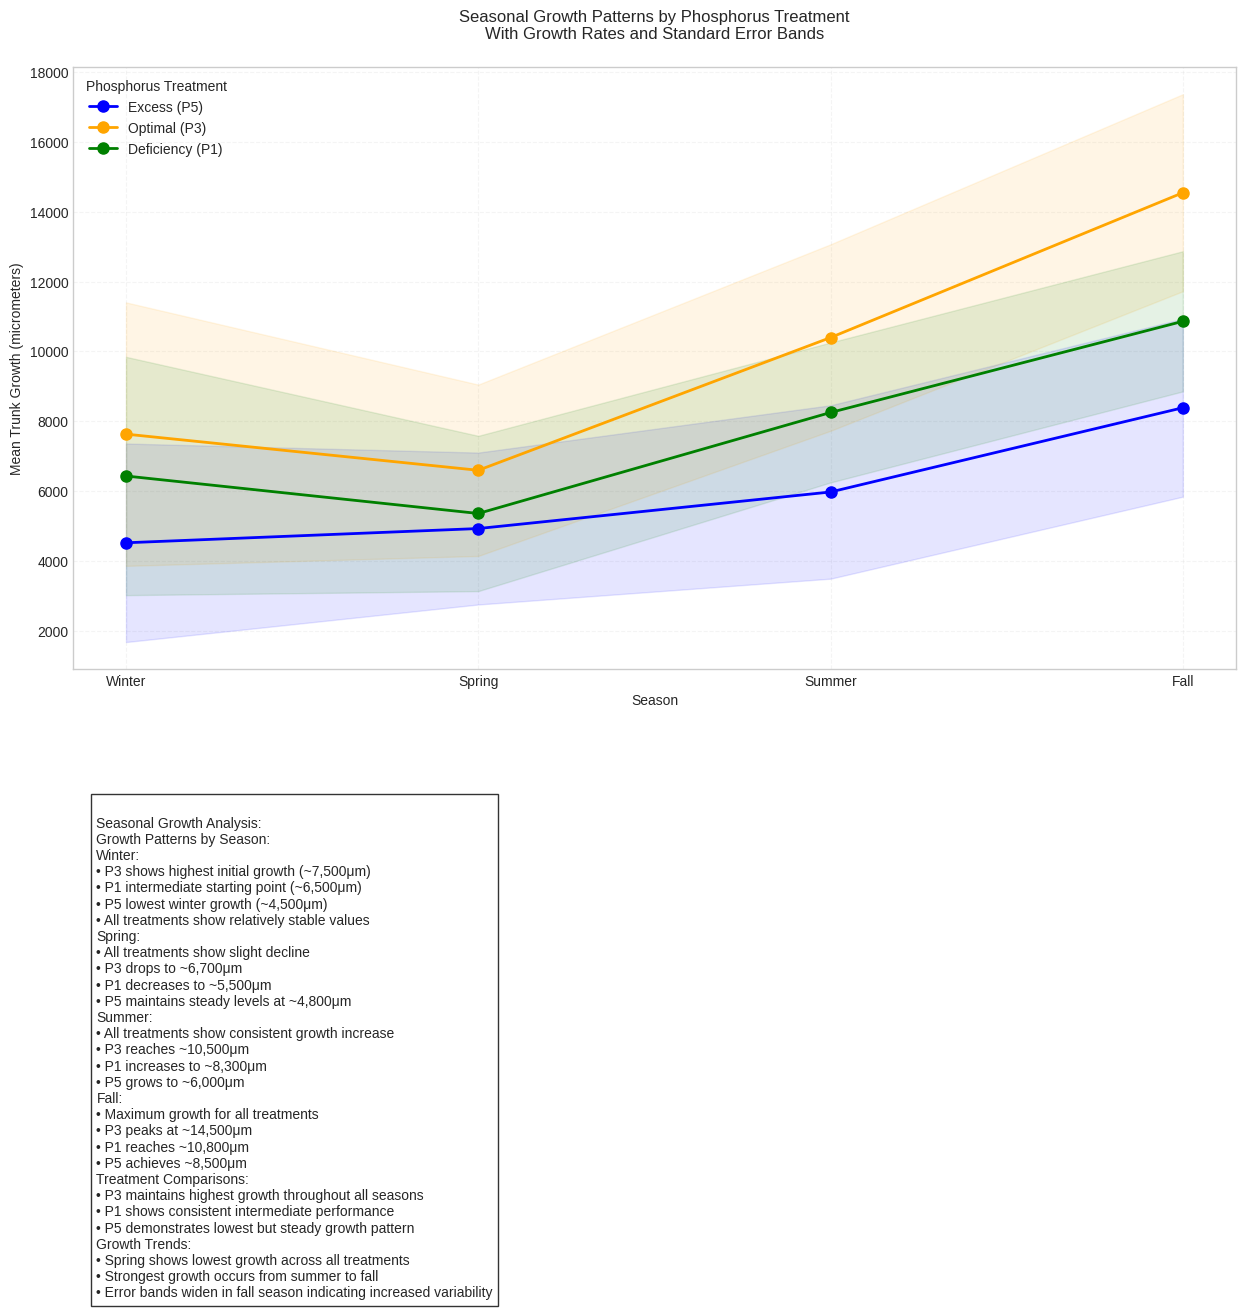


Detailed Growth Analysis:
--------------------------------------------------

P5 Treatment:
Spring to Summer Growth Rate: 21.3%
Summer to Fall Growth Rate: 40.4%
Maximum Growth: 8388 μm
Minimum Growth: 4520 μm
Growth Variability: 5025 μm

P3 Treatment:
Spring to Summer Growth Rate: 57.6%
Summer to Fall Growth Rate: 39.9%
Maximum Growth: 14548 μm
Minimum Growth: 6597 μm
Growth Variability: 6552 μm

P1 Treatment:
Spring to Summer Growth Rate: 54.0%
Summer to Fall Growth Rate: 31.6%
Maximum Growth: 10864 μm
Minimum Growth: 5359 μm
Growth Variability: 4178 μm


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

def analyze_seasonal_patterns(data, gaps):
    """
    Enhanced analysis of seasonal growth patterns with statistical indicators and recommendations
    """
    # Create figure with subplot grid
    fig = plt.figure(figsize=(15, 12))
    gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)

    # Main plot
    ax1 = fig.add_subplot(gs[0])

    # Add season column with proper ordering
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    data['season'] = pd.cut(data['time'].dt.month,
                           bins=[0, 3, 6, 9, 12],
                           labels=season_order)

    # Plot treatment patterns with enhanced styling
    colors = {'P1': 'green', 'P3': 'orange', 'P5': 'blue'}
    labels = {'P1': 'Deficiency (P1)', 'P3': 'Optimal (P3)', 'P5': 'Excess (P5)'}

    # Calculate statistics for each treatment and season
    stats_by_group = {}
    growth_rates = {}

    for treatment in data['trt'].unique():
        treatment_data = data[data['trt'] == treatment]
        seasonal_stats = treatment_data.groupby('season')['value'].agg(['mean', 'std']).reindex(season_order)
        stats_by_group[treatment] = seasonal_stats

        # Plot mean values with error bands
        ax1.plot(range(len(season_order)), seasonal_stats['mean'],
                label=labels[treatment], color=colors[treatment],
                marker='o', markersize=8, linewidth=2)

        # Add error bands (±1 standard error)
        std_error = seasonal_stats['std'] / np.sqrt(len(treatment_data['sample'].unique()))
        ax1.fill_between(range(len(season_order)),
                        seasonal_stats['mean'] - std_error,
                        seasonal_stats['mean'] + std_error,
                        color=colors[treatment], alpha=0.1)

        # Calculate seasonal growth rates
        growth_rates[treatment] = {
            'spring_to_summer': ((seasonal_stats.loc['Summer', 'mean'] -
                                seasonal_stats.loc['Spring', 'mean']) /
                               seasonal_stats.loc['Spring', 'mean'] * 100),
            'summer_to_fall': ((seasonal_stats.loc['Fall', 'mean'] -
                              seasonal_stats.loc['Summer', 'mean']) /
                             seasonal_stats.loc['Summer', 'mean'] * 100)
        }

    # Enhance main plot
    ax1.set_title('Seasonal Growth Patterns by Phosphorus Treatment\n' +
                 'With Growth Rates and Standard Error Bands', pad=20)
    ax1.set_xlabel('Season')
    ax1.set_ylabel('Mean Trunk Growth (micrometers)')
    ax1.set_xticks(range(len(season_order)))
    ax1.set_xticklabels(season_order)
    ax1.grid(True, alpha=0.2, linestyle='--')
    ax1.legend(title='Phosphorus Treatment', loc='upper left')

    # Add seasonal_analysis panel
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')


    seasonal_analysis = [
        "\nSeasonal Growth Analysis:",

        "Growth Patterns by Season:",

        "Winter:",
        "• P3 shows highest initial growth (~7,500μm)",
        "• P1 intermediate starting point (~6,500μm)",
        "• P5 lowest winter growth (~4,500μm)",
        "• All treatments show relatively stable values",

        "Spring:",
        "• All treatments show slight decline",
        "• P3 drops to ~6,700μm",
        "• P1 decreases to ~5,500μm",
        "• P5 maintains steady levels at ~4,800μm",

        "Summer:",
        "• All treatments show consistent growth increase",
        "• P3 reaches ~10,500μm",
        "• P1 increases to ~8,300μm",
        "• P5 grows to ~6,000μm",

        "Fall:",
        "• Maximum growth for all treatments",
        "• P3 peaks at ~14,500μm",
        "• P1 reaches ~10,800μm",
        "• P5 achieves ~8,500μm",

        "Treatment Comparisons:",
        "• P3 maintains highest growth throughout all seasons",
        "• P1 shows consistent intermediate performance",
        "• P5 demonstrates lowest but steady growth pattern",

        "Growth Trends:",
        "• Spring shows lowest growth across all treatments",
        "• Strongest growth occurs from summer to fall",
        "• Error bands widen in fall season indicating increased variability"
    ]

    ax2.text(0.02, 0.95, '\n'.join(seasonal_analysis),
             transform=ax2.transAxes,
             verticalalignment='top',
             bbox=dict(facecolor='white', alpha=0.8),
             fontsize=10)

    plt.tight_layout()

    # Calculate comprehensive statistics
    stats_summary = {trt: {
        'spring_to_summer_growth': growth_rates[trt]['spring_to_summer'],
        'summer_to_fall_growth': growth_rates[trt]['summer_to_fall'],
        'max_growth': stats_by_group[trt]['mean'].max(),
        'min_growth': stats_by_group[trt]['mean'].min(),
        'variability': stats_by_group[trt]['std'].mean()
    } for trt in data['trt'].unique()}

    return fig, stats_summary

# Create the visualization and get statistics
data = pd.read_csv("data.Phosphorus.csv", parse_dates=["time"])
fig, stats = analyze_seasonal_patterns(data, gaps)
plt.show()

# Print detailed statistical analysis
print("\nDetailed Growth Analysis:")
print("-" * 50)
for trt, stat in stats.items():
    print(f"\n{trt} Treatment:")
    print(f"Spring to Summer Growth Rate: {stat['spring_to_summer_growth']:.1f}%")
    print(f"Summer to Fall Growth Rate: {stat['summer_to_fall_growth']:.1f}%")
    print(f"Maximum Growth: {stat['max_growth']:.0f} μm")
    print(f"Minimum Growth: {stat['min_growth']:.0f} μm")
    print(f"Growth Variability: {stat['variability']:.0f} μm")

### Check Unstable sensors

Final sensor analysis reveals that Sensor 41 should be excluded from the study due to technical issues:
- Significant data gaps (350 gaps, up to 36 hours) with only 82% data completeness
- Abnormally linear growth pattern
- Suspiciously low daily variation (std=10.92)

In contrast, Sensor 65 shows reliable behavior:
- High data completeness (98%) with minimal gaps (max 11 hours)
- Daily growth rate (26.56) matching other sensors (e.g., Sensor 20: 27.16)
- Natural daily variations (std=16.58)

Recommendation: Remove Sensor 41 from analysis while retaining Sensor 65.



Sensor 41:
Class: P5
Number of measurements: 5023
Date range: 2022-02-03 12:00:00 to 2024-01-25 06:00:00

Basic statistics:
count    5023.000000
mean     2321.269162
std      2108.721121
min      -105.000000
25%        65.000000
50%      1850.000000
75%      4655.000000
max      5425.000000
Name: value, dtype: float64


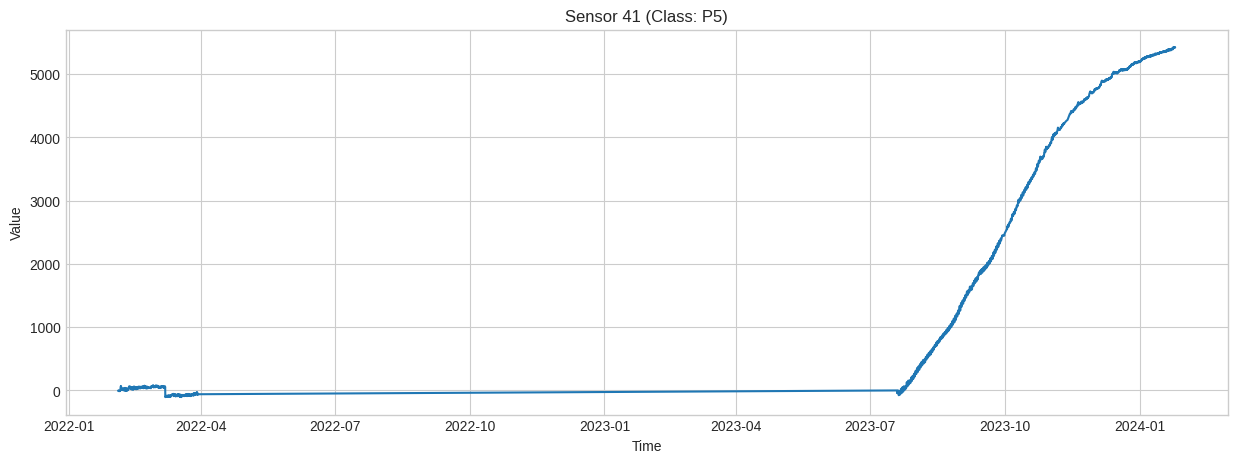


Sensor 65:
Class: P5
Number of measurements: 4867
Date range: 2022-02-04 11:00:00 to 2024-01-25 05:00:00

Basic statistics:
count    4867.000000
mean     2363.086090
std      1697.280437
min       -55.000000
25%       375.000000
50%      2790.000000
75%      3992.500000
max      4460.000000
Name: value, dtype: float64


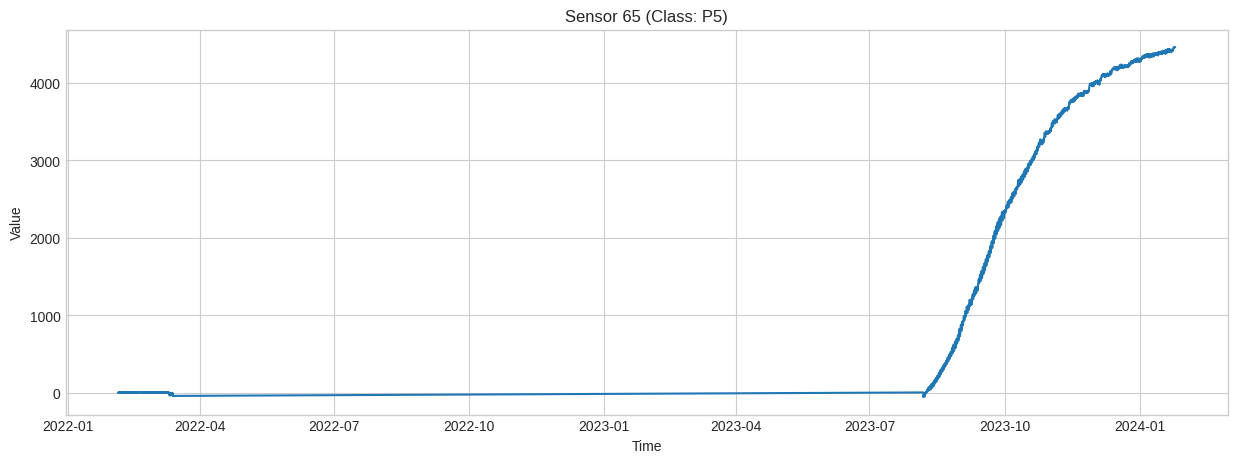

In [19]:
# Load and prepare data
data = pd.read_csv("data.Phosphorus.csv", parse_dates=['time'])

#check sensors 41 & 65
for sensor_id in [41, 65]:
    sensor_data = data[data['sample'] == sensor_id]
    print(f"\nSensor {sensor_id}:")
    print(f"Class: {sensor_data['trt'].iloc[0]}")
    print(f"Number of measurements: {len(sensor_data)}")
    print(f"Date range: {sensor_data['time'].min()} to {sensor_data['time'].max()}")

    # statistics
    print("\nBasic statistics:")
    print(sensor_data['value'].describe())

    # Vizualisation
    plt.figure(figsize=(15, 5))
    plt.plot(sensor_data['time'], sensor_data['value'])
    plt.title(f'Sensor {sensor_id} (Class: {sensor_data["trt"].iloc[0]})')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()


Sensor 41:
Class: P5
Number of measurements: 3396

Basic statistics:
count    3396.000000
mean     3405.011779
std      1698.467741
min       425.000000
25%      1768.750000
50%      3855.000000
75%      5055.000000
max      5425.000000
Name: value, dtype: float64


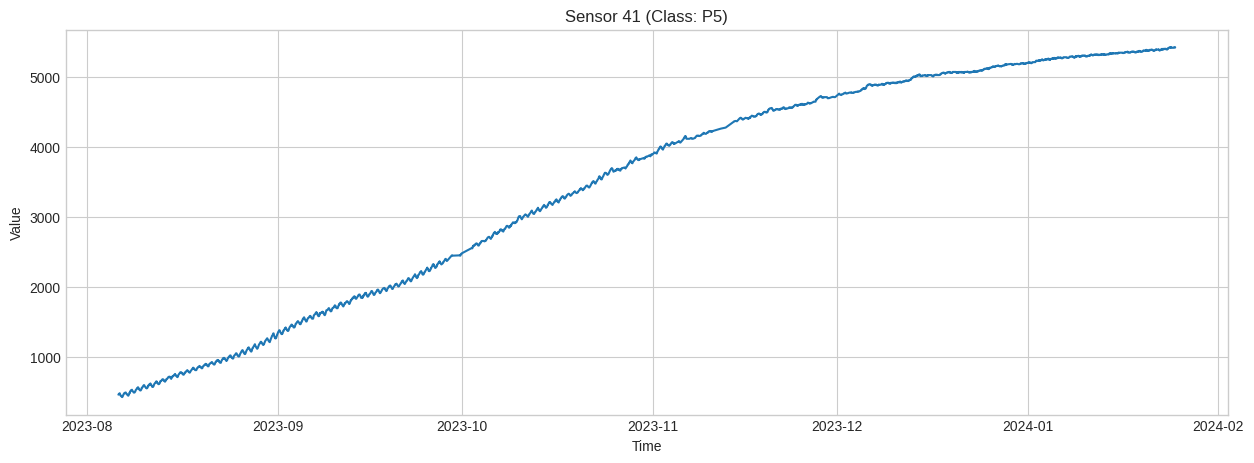


Sensor 65:
Class: P5
Number of measurements: 3999

Basic statistics:
count    3999.000000
mean     2872.278070
std      1427.299742
min       -55.000000
25%      1725.000000
50%      3375.000000
75%      4115.000000
max      4460.000000
Name: value, dtype: float64


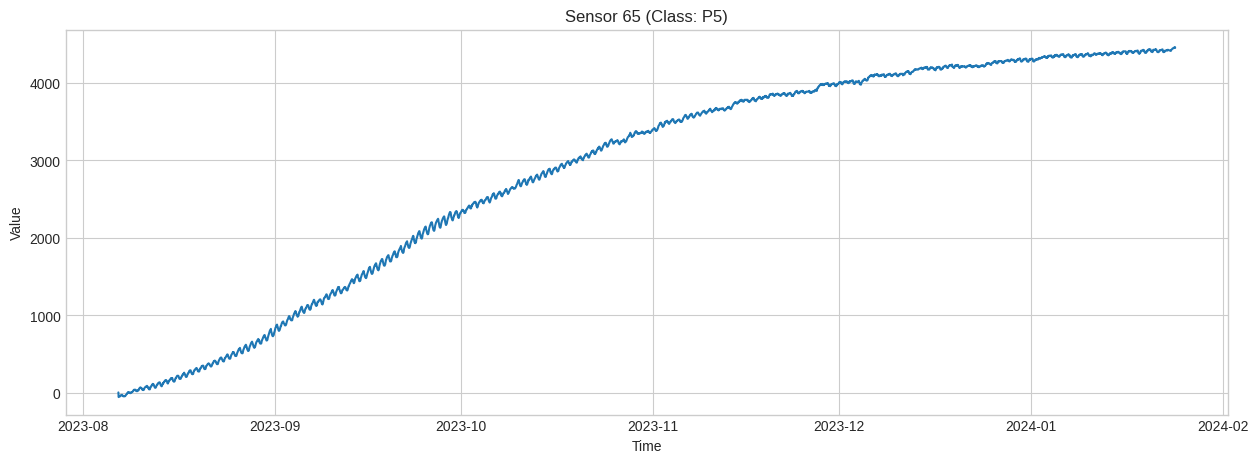

In [25]:
#check active period

START_DATE = "2023-08-06"
END_DATE = "2024-01-25"

for sensor_id in [41, 65]:
    sensor_data = data[
        (data['sample'] == sensor_id) &
        (data['time'] >= START_DATE) &
        (data['time'] <= END_DATE)
    ]

    print(f"\nSensor {sensor_id}:")
    print(f"Class: {sensor_data['trt'].iloc[0]}")
    print(f"Number of measurements: {len(sensor_data)}")

    # statistics
    print("\nBasic statistics:")
    print(sensor_data['value'].describe())

    # Vizualisation
    plt.figure(figsize=(15, 5))
    plt.plot(sensor_data['time'], sensor_data['value'])
    plt.title(f'Sensor {sensor_id} (Class: {sensor_data["trt"].iloc[0]})')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()

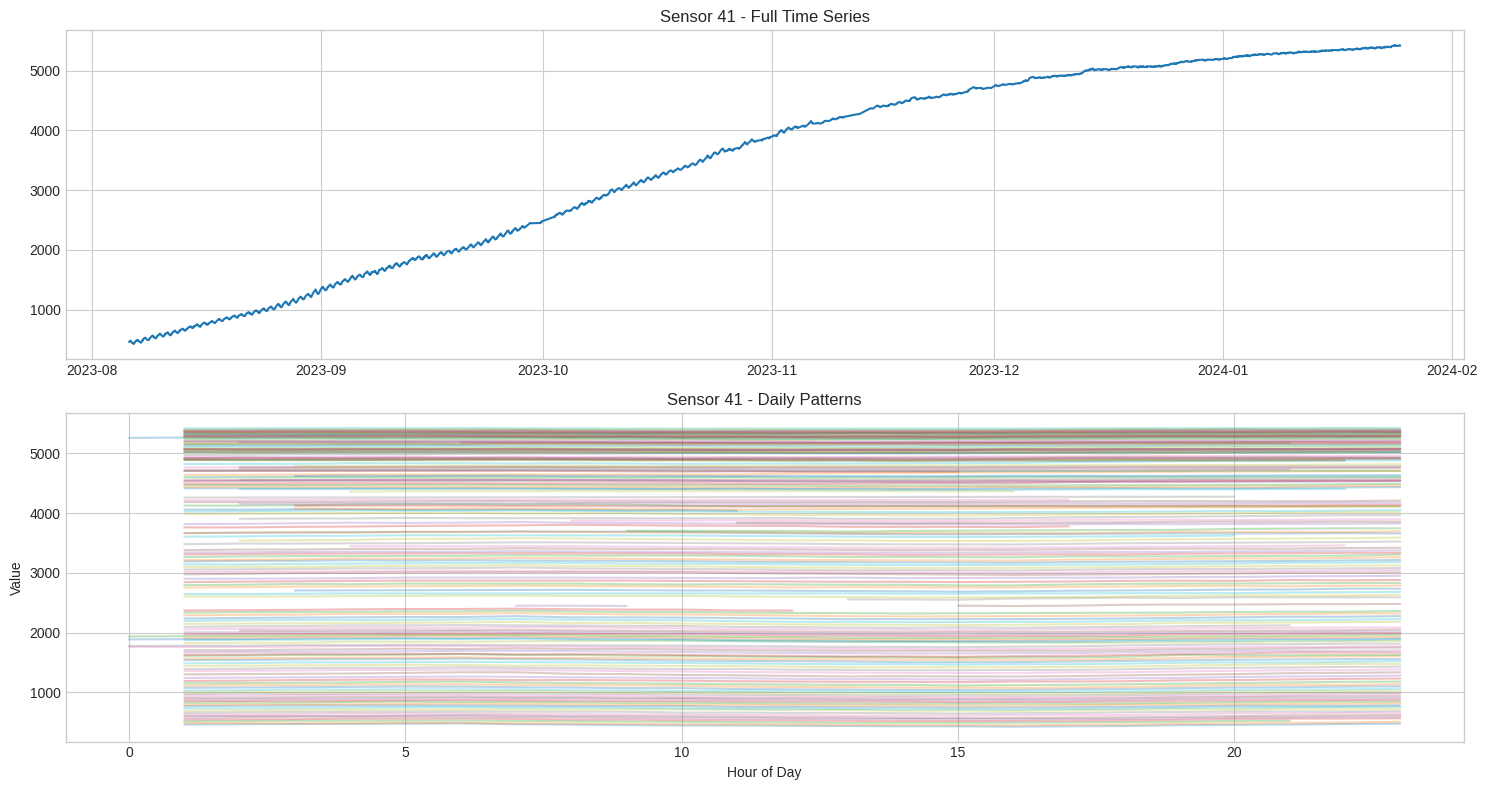


Daily Statistics for Sensor 41:
              mean         std          min          max
count   170.000000  169.000000   170.000000   170.000000
mean   3437.216059   10.920961  3420.176471  3455.235294
std    1621.241339    5.152571  1627.999998  1615.555194
min     454.090909    2.881041   425.000000   480.000000
25%    1947.705556    5.830274  1917.500000  1967.500000
50%    3836.000000   10.970676  3820.000000  3855.000000
75%    4985.760870   15.406225  4962.500000  5005.000000
max    5418.913043   23.832419  5415.000000  5425.000000


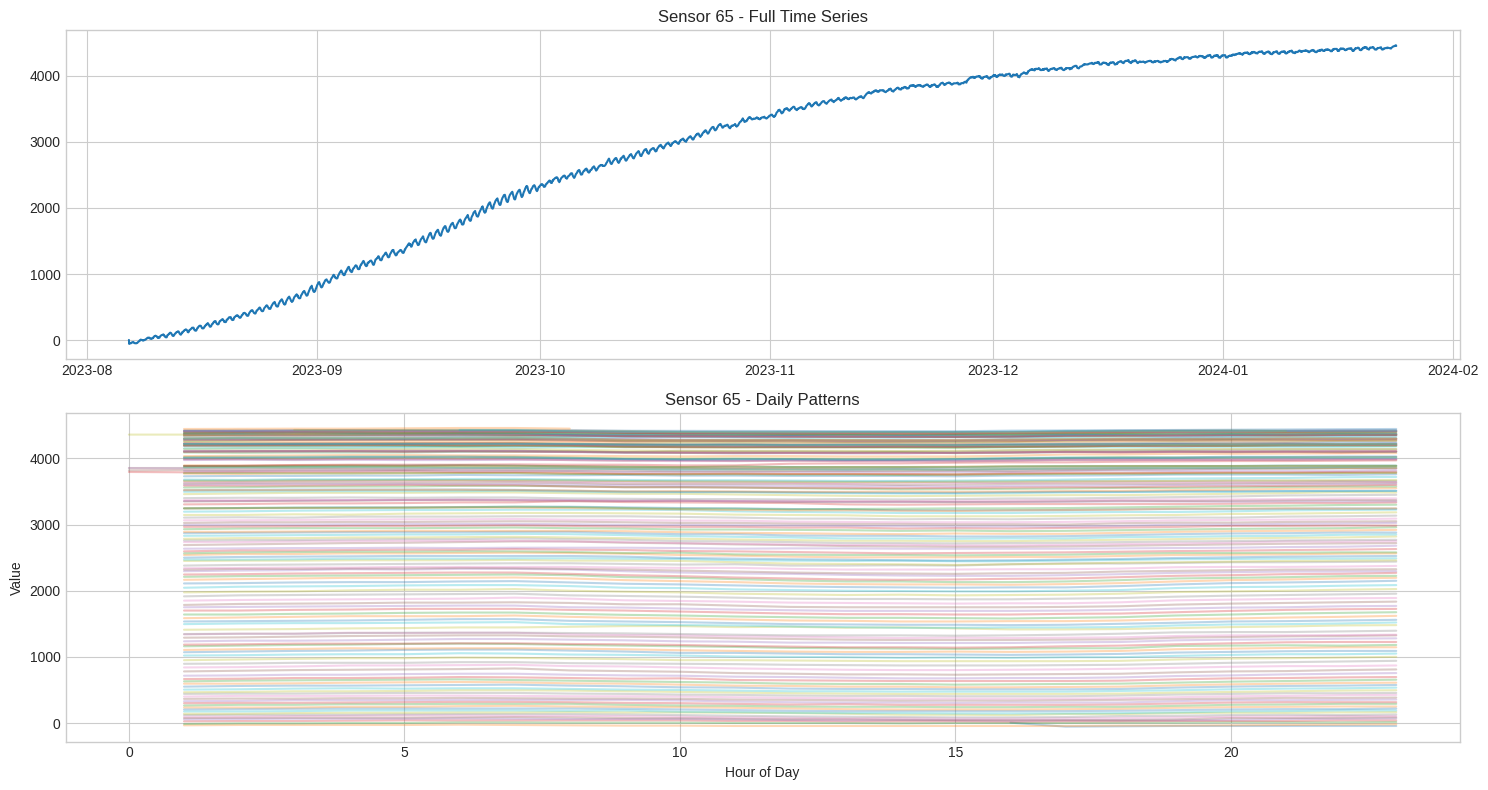


Daily Statistics for Sensor 65:
              mean         std          min          max
count   172.000000  172.000000   172.000000   172.000000
mean   2855.751024   16.585597  2829.244186  2880.930233
std    1452.912594    7.623788  1458.736539  1447.148540
min     -40.625000    5.669467   -55.000000   -20.000000
25%    1673.532609   11.008873  1625.000000  1712.500000
50%    3363.586957   14.812505  3347.500000  3385.000000
75%    4141.739130   20.835425  4120.000000  4157.500000
max    4452.857143   39.122035  4445.000000  4460.000000


In [21]:
def analyze_daily_patterns(data, sensor_id):
# filter sensor data to active dates
    sensor_data = data[
        (data['sample'] == sensor_id) &
        (data['time'] >= START_DATE) &
        (data['time'] <= END_DATE)
    ].copy()

# hour date columns
    sensor_data['hour'] = sensor_data['time'].dt.hour
    sensor_data['date'] = sensor_data['time'].dt.date

# growth graph
    plt.figure(figsize=(15, 8))

    plt.subplot(2, 1, 1)
    plt.plot(sensor_data['time'], sensor_data['value'])
    plt.title(f'Sensor {sensor_id} - Full Time Series')
    plt.grid(True)

# daily patterns
    plt.subplot(2, 1, 2)
    for date in sensor_data['date'].unique():
        day_data = sensor_data[sensor_data['date'] == date]
        plt.plot(day_data['hour'], day_data['value'], alpha=0.3)

    plt.title(f'Sensor {sensor_id} - Daily Patterns')
    plt.xlabel('Hour of Day')
    plt.ylabel('Value')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# statistics
    daily_stats = sensor_data.groupby('date')['value'].agg(['mean', 'std', 'min', 'max'])
    print(f"\nDaily Statistics for Sensor {sensor_id}:")
    print(daily_stats.describe())

# sensor analysis
for sensor_id in [41, 65]:
    analyze_daily_patterns(data, sensor_id)

In [22]:
def calculate_growth_rate(data, sensor_id):
    sensor_data = data[
        (data['sample'] == sensor_id) &
        (data['time'] >= START_DATE) &
        (data['time'] <= END_DATE)
    ]

    total_days = (sensor_data['time'].max() - sensor_data['time'].min()).days
    total_growth = sensor_data['value'].max() - sensor_data['value'].min()
    daily_growth = total_growth / total_days

    return daily_growth

for sensor_id in [20, 65]:
    growth_rate = calculate_growth_rate(data, sensor_id)
    print(f"Sensor {sensor_id} average daily growth: {growth_rate:.2f}")

Sensor 20 average daily growth: 27.16
Sensor 65 average daily growth: 26.56


In [26]:
def check_data_continuity(data, sensor_id):
    # Filter data for the specific sensor within the date range
    sensor_data = data[
        (data['sample'] == sensor_id) &
        (data['time'] >= START_DATE) &
        (data['time'] <= END_DATE)
    ].copy()

    # Sort by time and reset the index
    sensor_data = sensor_data.sort_values('time').reset_index(drop=True)

    # Calculate time differences between consecutive measurements (in hours)
    time_diffs = sensor_data['time'].diff().dt.total_seconds() / 3600

    # Find gaps larger than 1 hour
    gaps = time_diffs[time_diffs > 1]

    print(f"\nSensor {sensor_id}:")
    print(f"Total measurements: {len(sensor_data)}")
    print(f"Expected measurements (hourly): {((sensor_data['time'].max() - sensor_data['time'].min()).total_seconds() / 3600):.0f}")
    print(f"Number of gaps: {len(gaps)}")

    if len(gaps) > 0:
        print("\nLargest gaps:")
        largest_gaps = gaps.nlargest(5)  # Display the 5 largest gaps
        for idx in largest_gaps.index:
            gap_start = sensor_data.loc[idx-1, 'time']
            gap_end = sensor_data.loc[idx, 'time']
            gap_duration = gaps[idx]
            print(f"Gap from {gap_start} to {gap_end} ({gap_duration:.1f} hours)")

# Check all sensors
for sensor_id in [41, 65]:
    check_data_continuity(data, sensor_id)


Sensor 41:
Total measurements: 3396
Expected measurements (hourly): 4126
Number of gaps: 350

Largest gaps:
Gap from 2023-10-01 01:00:00 to 2023-10-02 13:00:00 (36.0 hours)
Gap from 2023-11-10 17:00:00 to 2023-11-12 01:00:00 (32.0 hours)
Gap from 2023-11-12 20:00:00 to 2023-11-14 04:00:00 (32.0 hours)
Gap from 2023-09-29 09:00:00 to 2023-09-30 15:00:00 (30.0 hours)
Gap from 2023-09-28 12:00:00 to 2023-09-29 07:00:00 (19.0 hours)

Sensor 65:
Total measurements: 3999
Expected measurements (hourly): 4096
Number of gaps: 198

Largest gaps:
Gap from 2024-01-23 04:00:00 to 2024-01-23 15:00:00 (11.0 hours)
Gap from 2024-01-21 21:00:00 to 2024-01-22 06:00:00 (9.0 hours)
Gap from 2023-08-28 06:00:00 to 2023-08-28 10:00:00 (4.0 hours)
Gap from 2024-01-20 23:00:00 to 2024-01-21 03:00:00 (4.0 hours)
Gap from 2024-01-23 19:00:00 to 2024-01-23 23:00:00 (4.0 hours)


### Exploratory Data Analysis Summary

## Dataset Overview
- Time Range: February 2022 - January 2024
- Treatments: P1 (deficiency), P3 (optimal), P5 (excess)
- Key Gap: December 18, 2022 - February 20, 2023
- Trees Distribution: P1 (3 trees), P3 (5 trees), P5 (4 trees)

## Data Quality Analysis
- Identified sensor issues: Sensor 41 removed due to technical problems (82% completeness, abnormal patterns)
- Confirmed reliability of other sensors, including Sensor 65
- Missing timestamps handled with limited interpolation

## Growth Patterns
1. Treatment Effects:
   - P3 (optimal) shows highest mean diameter values
   - P1 (deficiency) demonstrates intermediate growth
   - P5 (excess) exhibits lowest growth rates

2. Temporal Patterns:
   - Daily cycles observed in all treatments
   - Seasonal variations with stronger growth in summer-fall
   - Clear diurnal patterns with trunk shrinkage during peak water stress hours

3. Measurement Characteristics:
   - Trunk growth measured in micrometers
   - Average daily growth ~27 micrometers in healthy trees
   - Natural daily variations with std deviation ~16 micrometers

## Statistical Insights
- Mean value: 8,330 micrometers
- Standard deviation: 6,267 micrometers
- Range: -105 to +25,925 micrometers
- Natural trunk shrinkage observed in 1.05% of measurements
